IFTS 24

# Ejercicios de Procesamiento Digital de Imágenes



## TP Muestreo y Cuantización

Profesor: **Matías Barreto**

Alumna: **Gabriela Pari Vaca**


---

## Importación de librerías





In [19]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


### Selección de imagen

Elegí una imagen en escala de grises dentro del repositorio de Berkeley

In [20]:
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/323016.jpg -O "astronautas-bn.jpg"

--2025-06-23 21:57:14--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/323016.jpg
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25337 (25K) [image/jpeg]
Saving to: ‘astronautas-bn.jpg’

astronautas-bn.jpg  100%[===================>]  24.74K  --.-KB/s    in 0.02s   

2025-06-23 21:57:14 (1.46 MB/s) - ‘astronautas-bn.jpg’ saved [25337/25337]



## Librerías auxiliares

In [21]:
def info_imagen(imagen):
    print("Mínimo:", imagen.min())
    print("Máximo:", imagen.max())
    print("Dimensiones de la imagen:", imagen.shape)
    print("Tipo de datos:", imagen.dtype)
    print("Tamaño en memoria BGR(bytes):", imagen.nbytes)


def mostrar_imagen(imagen, titulo, gama='gray',figsize=None):
    plt.figure(figsize=figsize)
    plt.title(titulo)
    plt.imshow(imagen, cmap=gama)
    plt.show()

canales_RGB = {'Rojo': 0, 'Verde': 1, 'Azul': 2}
canales_BGR = {'Azul': 0, 'Verde': 1, 'Rojo': 2}

def obtener_canal(imagen, canal, es_RGB=True):
    if es_RGB:
        return imagen[:, :, canales_RGB[canal]]
    else:
        return imagen[:, :, canales_BGR[canal]]

### Información de la imagen

In [22]:
imagen_astro = cv2.imread('astronautas-bn.jpg')
info_imagen(imagen_astro)

Mínimo: 0
Máximo: 255
Dimensiones de la imagen: (321, 481, 3)
Tipo de datos: uint8
Tamaño en memoria BGR(bytes): 463203




La imagen posee un mínimo es 0 y llega al máximo de intensidad, esto se puede ver reflejado en la imagen donde se puede ver el color negro de los bordes, y el máximo de intensidad en el blanco del traje de los astronautas.

### Selección de un canal

En este caso, al ser una imagen en escala de grises, no hay deferencia de elegir entre un canal u otro. Los valores son de intensidad de luz


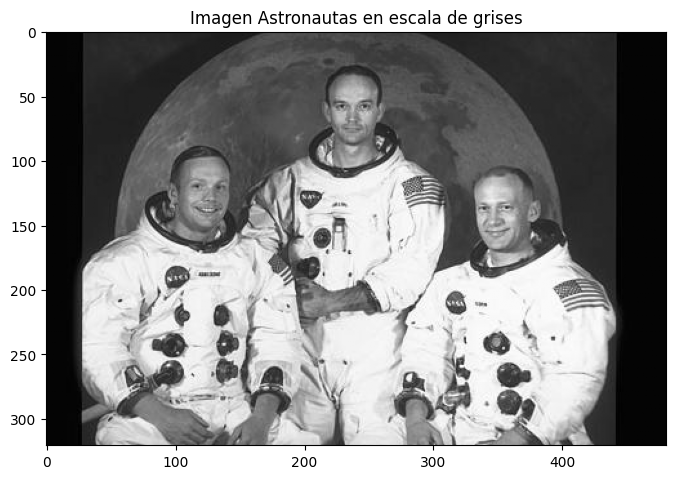

In [23]:
imagen_astro_canal_0 = obtener_canal(imagen_astro, 'Azul', es_RGB=False)
mostrar_imagen(imagen_astro_canal_0, titulo="Imagen Astronautas en escala de grises", figsize=(8, 8))


## Muestreo espacial

El muestreo espacial tiene varias aplicaciones, entre ellas:

**Reducción de resolución:** Disminuir la cantidad de píxeles en una imagen sin perder demasiada información. Esto es útil para optimizar almacenamiento y transmisión de datos.

**Interpolación y escalamiento:** Al cambiar la densidad de muestreo, se puede aumentar o reducir el tamaño de una imagen sin distorsionar demasiado los detalles.

**Segmentación y análisis de imágenes:** Ayuda en la detección de bordes, reconocimiento de objetos y clasificación de patrones.

**Compresión de imágenes:** Afecta cómo se representan los datos en algoritmos de compresión como JPEG, reduciendo la cantidad de información redundante.

**Procesamiento en visión por computadora:** Se utiliza en aplicaciones de inteligencia artificial y visión artificial para mejorar la interpretación de imágenes en sistemas de reconocimiento facial, vehículos autónomos y más.

Si el muestreo espacial es demasiado bajo, la imagen puede perder detalles y volverse borrosa o pixelada. Por otro lado, un muestreo espacial más alto proporciona mayor calidad, pero requiere más almacenamiento y poder de procesamiento.

Se inicializan tres valores por los cuales vamos a transformar a la imagen.


In [24]:
d1 = 2   # Factor de muestreo: toma 1 pixel cada 2 pixeles
d2 = 4   # Factor de muestreo: toma 1 pixel cada 4 pixeles
d3 = 8   # Factor de muestreo: toma 1 pixel cada 8 pixeles

def muestreo_espacial(X, d):
    (Nx,Mx) = X.shape          # Obtiene dimensiones de imagen original
    ix = range(0,Nx,d)         # Crea secuencia de 0 a Nx saltando de d en d
    jx = range(0,Mx,d)         # Igual para columnas
    Ny = len(ix)               # Nueva altura = número de filas a tomar
    My = len(jx)               # Nueva anchura = número de columnas a tomar
    print(f'Resolución reducida de {Nx}x{Mx} a {Ny}x{My} pixels')
    reduccion = (1 - (Ny * My) / (Nx * Mx)) * 100
    print(f'Porcentaje de reducción de datos: {reduccion:.2f}%')
    # Crea nueva imagen muestreada
    Y = np.zeros((Ny,My), np.uint8)  # Matriz vacía de enteros 0-255
    for i in range(Ny):              # Para cada fila
        for j in range(My):          # Para cada columna
            Y[i,j] = X[ix[i],jx[j]]  # Copia el pixel correspondiente

    return Y



### Factor 2


Resolución reducida de 321x481 a 161x241 pixels
Porcentaje de reducción de datos: 74.87%


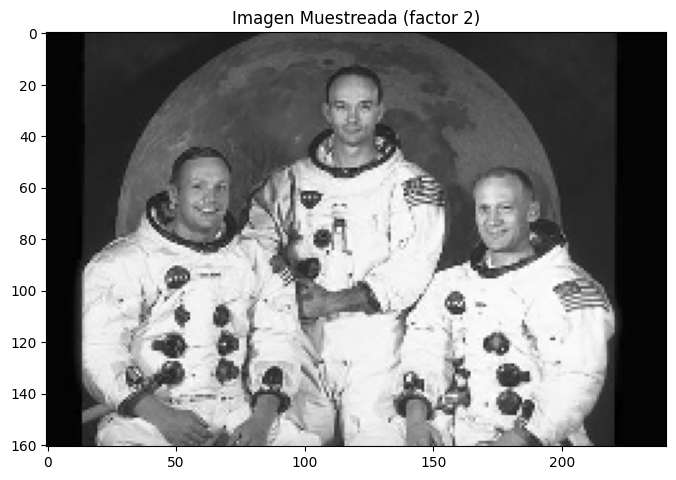

Mínimo: 0
Máximo: 255
Dimensiones de la imagen: (161, 241)
Tipo de datos: uint8
Tamaño en memoria BGR(bytes): 38801


In [25]:
img_d1 = muestreo_espacial(imagen_astro_canal_0, d1)
mostrar_imagen(img_d1, f'Imagen Muestreada (factor {d1})', figsize=(8,8))
info_imagen(img_d1)

Luego de la transformación la imagen se redujo al 74.87%, se ve un poco pixelada, pero se siguen manteniendo la definición de los bordes de los objetos mas grandes. tal vez en los ojos se puede ver que esta perdiendo datos.

### Factor 4

Resolución reducida de 321x481 a 81x121 pixels
Porcentaje de reducción de datos: 93.65%


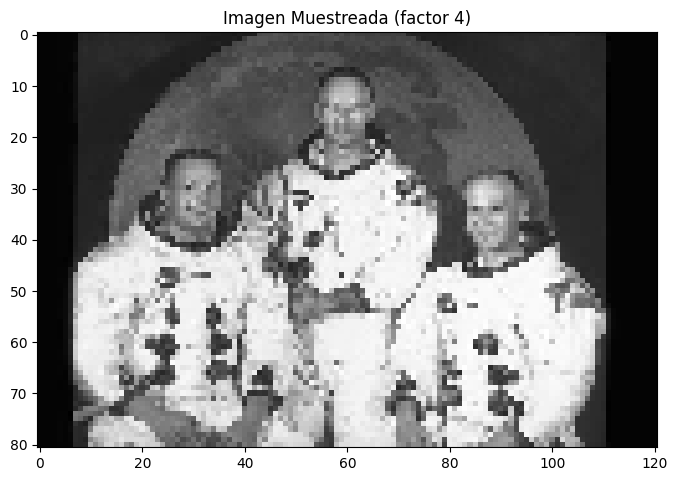

Mínimo: 0
Máximo: 255
Dimensiones de la imagen: (81, 121)
Tipo de datos: uint8
Tamaño en memoria BGR(bytes): 9801


In [26]:
img_d2 = muestreo_espacial(imagen_astro_canal_0, d2)
mostrar_imagen(img_d2, f'Imagen Muestreada (factor {d2})', figsize=(8,8))
info_imagen(img_d2)

La imagen se redujo a 81x121 pixeles, y se puede apreciar que se los bordes de los objetos, en este caso los astronautas ya se ven pixelados, la definición del rostro se ve muy pixelada, casi irreconocible, aún se puede diferenciar entre los distintos objetos.

### Factor 8

Resolución reducida de 321x481 a 41x61 pixels
Porcentaje de reducción de datos: 98.38%


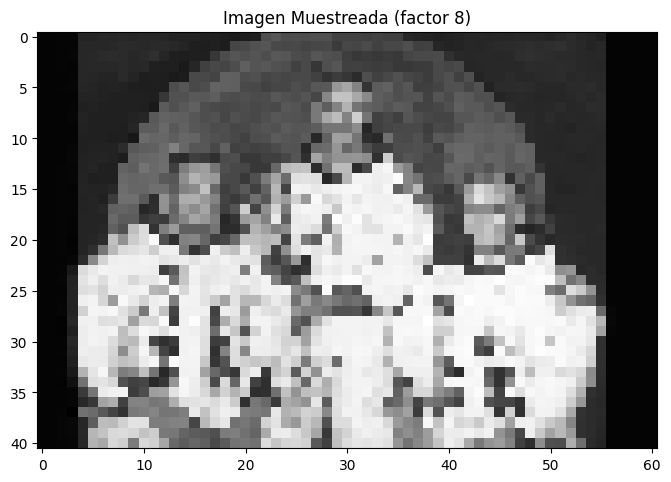

Mínimo: 0
Máximo: 255
Dimensiones de la imagen: (41, 61)
Tipo de datos: uint8
Tamaño en memoria BGR(bytes): 2501


In [27]:
img_d3 = muestreo_espacial(imagen_astro_canal_0, d3)
mostrar_imagen(img_d3, f'Imagen Muestreada (factor {d3})', figsize=(8,8))
info_imagen(img_d3)

Esta imagen perdió el 98.38% de datos, ahora ya es un poco difícil diferenciar los limites de los objetos pero aún se pueden seguir diferenciando que hay tres siluetas y la imagen de la luna por detrás.

In [28]:
info_imagen(imagen_astro_canal_0)
info_imagen(img_d1)
info_imagen(img_d2)
info_imagen(img_d3)
im_total = [img_d1, img_d2, img_d3]

Mínimo: 0
Máximo: 255
Dimensiones de la imagen: (321, 481)
Tipo de datos: uint8
Tamaño en memoria BGR(bytes): 154401
Mínimo: 0
Máximo: 255
Dimensiones de la imagen: (161, 241)
Tipo de datos: uint8
Tamaño en memoria BGR(bytes): 38801
Mínimo: 0
Máximo: 255
Dimensiones de la imagen: (81, 121)
Tipo de datos: uint8
Tamaño en memoria BGR(bytes): 9801
Mínimo: 0
Máximo: 255
Dimensiones de la imagen: (41, 61)
Tipo de datos: uint8
Tamaño en memoria BGR(bytes): 2501



## Conclusión

Parte de las ventajas que el muestreo espacial luego de la reducción es que se consume menos memoria y eso se puede reflejado ver si comparamos la el tamaño de la imagen original 154401, y la imagen con el d=8, 2501 bytes. Con un factor de dos, se pierde un poco la definición de los objetos pequeños como los detalles de los trajes y los ojos, pero si vemos la imagen transformada con d=8, la imagen esta totalmente pixelada, perdiendo mucha información.


---



# Cuantización

La cuantización reduce el número de niveles de gris en la imagen. Es el proceso de convertir valores continuos en valores discretos. En el contexto del procesamiento de imágenes, se utiliza para reducir la cantidad de información que representa una imagen, asignando rangos de valores continuos a un conjunto limitado de valores posibles.


In [29]:
#  Factor de cuantización (32, 64, 128, 256)
q1 = 32
q2 = 64
q3 = 128
q4 = 256


def cuantizar_imagen(img_X, q):
    # Divide por q, redondea hacia abajo y multiplica por q
    Z = np.floor(img_X/q)*q      # Agrupa valores en intervalos de tamaño q
    Z = Z.astype(np.uint8)   # Convierte a enteros 0-255
    print(f'Esta imagen tiene {int(256/q)} niveles de gris (original: 255)')

    return Z




### Cuantización q = 32


Esta imagen tiene 8 niveles de gris (original: 255)


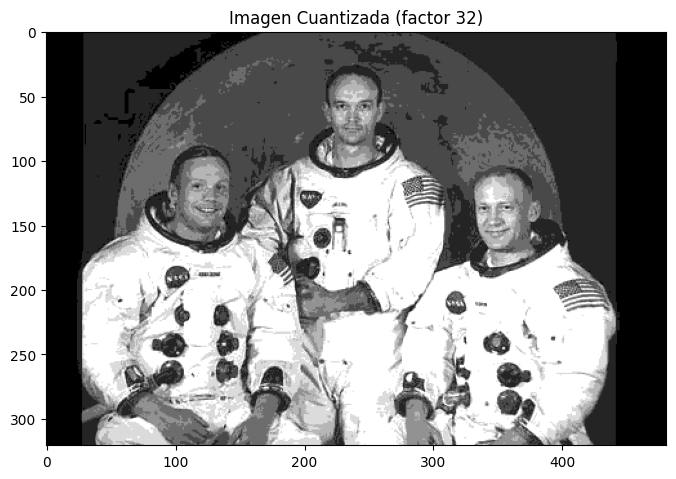

Mínimo: 0
Máximo: 224
Dimensiones de la imagen: (321, 481)
Tipo de datos: uint8
Tamaño en memoria BGR(bytes): 154401


In [30]:
img_q1 = cuantizar_imagen(imagen_astro_canal_0, q1)
mostrar_imagen(img_q1, f'Imagen Cuantizada (factor {q1})', figsize=(8,8))
info_imagen(img_q1)


Se puede apreciar el cambio en la imagen, pero se sigue viendo los detalles de los trajes y los rasgos faciales. Siendo que ahora lo componen 8 tonos de grises

## Cuantización q = 64

Esta imagen tiene 4 niveles de gris (original: 255)


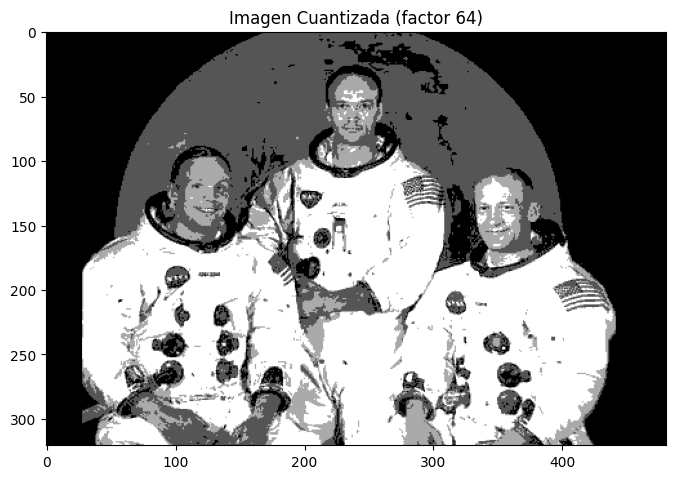

Mínimo: 0
Máximo: 192
Dimensiones de la imagen: (321, 481)
Tipo de datos: uint8
Tamaño en memoria BGR(bytes): 154401


In [31]:
img_q2 = cuantizar_imagen(imagen_astro_canal_0, q2)
mostrar_imagen(img_q2, f'Imagen Cuantizada (factor {q2})', figsize=(8,8))
info_imagen(img_q2)

Luego de la cuantización se puede ver los rostros de los astronautas se ven diferente, resaltando las areas de luz y opacando las otras areas, esta imagen esta compuesta por 4 tonalidades. Se puede distinguir los 4 objetos.

## Cuantización q = 128

Esta imagen tiene 2 niveles de gris (original: 255)


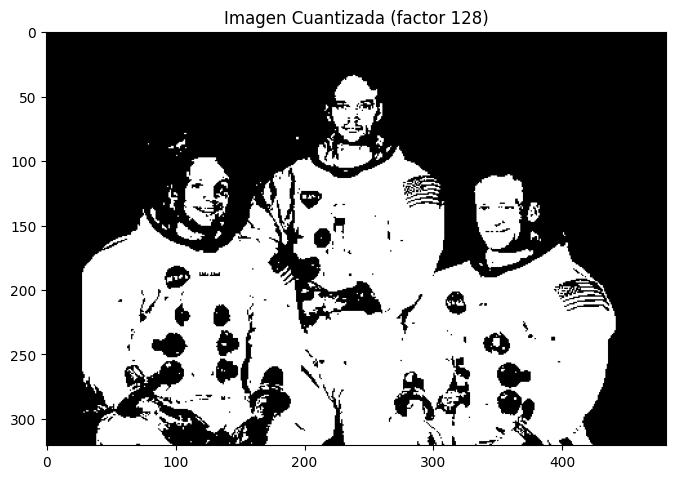

Mínimo: 0
Máximo: 128
Dimensiones de la imagen: (321, 481)
Tipo de datos: uint8
Tamaño en memoria BGR(bytes): 154401


In [32]:
img_q3 = cuantizar_imagen(imagen_astro_canal_0, q3)
mostrar_imagen(img_q3, f'Imagen Cuantizada (factor {q3})', figsize=(8,8))
info_imagen(img_q3)

Esta imagen esta compuesta por dos tonalidades, el negro y el gris medio, 0 y 128 respectivamente. En cuanto a tamaño en bytes no se vio afectado

## Cuantización q = 256

Esta imagen tiene 1 niveles de gris (original: 255)


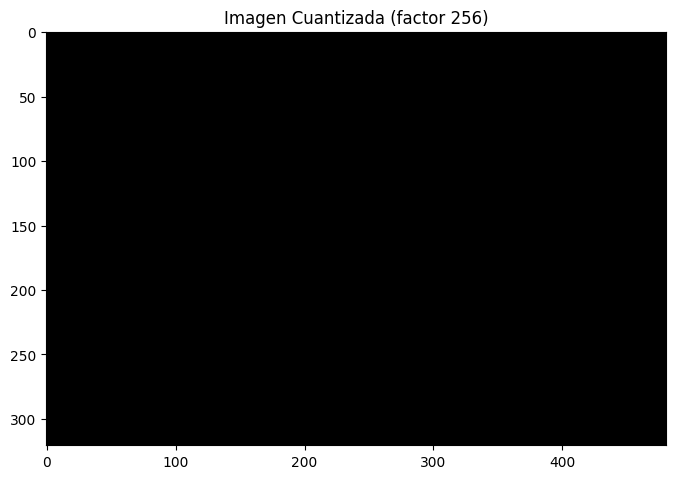

Mínimo: 0
Máximo: 0
Dimensiones de la imagen: (321, 481)
Tipo de datos: uint8
Tamaño en memoria BGR(bytes): 154401


In [33]:
img_q4 = cuantizar_imagen(imagen_astro_canal_0, q4)
mostrar_imagen(img_q4, f'Imagen Cuantizada (factor {q4})', figsize=(8,8))
info_imagen(img_q4)

El calculo de la cuantización de la imagen da como resultado 1, por eso es que se ve un solo color

## Histograma de la imagen

El histograma muestra la distribución de los niveles de gris en la imagen.


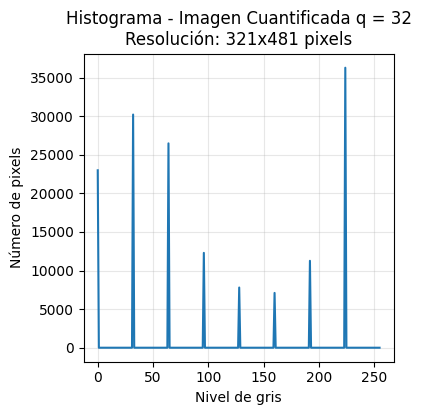

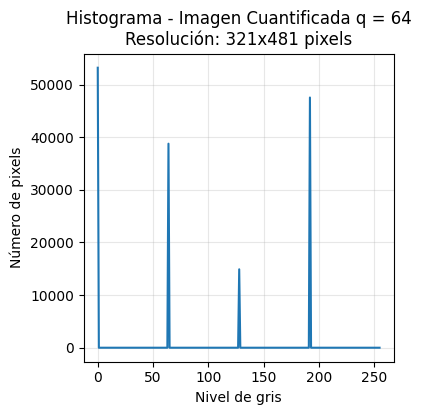

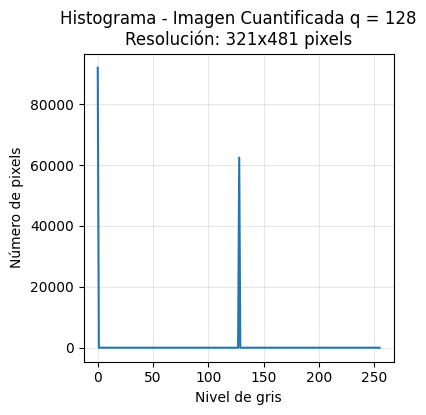

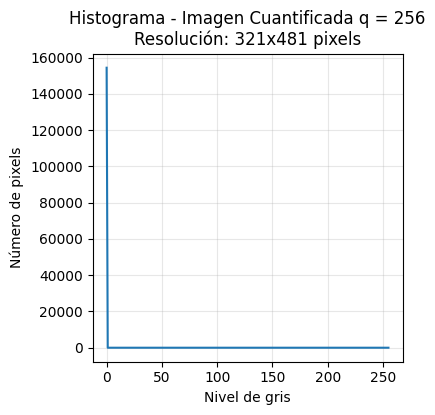

In [34]:
def hist(img):
    h = np.zeros(256)           # Vector para contar ocurrencias
    for i in range(img.shape[0]):    # Para cada fila
        for j in range(img.shape[1]): # Para cada columna
            h[img[i,j]] += 1         # Incrementa contador del valor
    return h

def mostrar_histograma(img, tipo_transformacion):
    # Histograma imagen muestreada
    plt.figure(figsize=(4, 4))
    plt.plot(hist(img))
    Ny, My = img.shape
    plt.title(f'Histograma - Imagen {tipo_transformacion}\nResolución: {Ny}x{My} pixels')
    plt.xlabel('Nivel de gris')
    plt.ylabel('Número de pixels')
    plt.grid(True, alpha=0.3)
    plt.show()

mostrar_histograma(img_q1, "Cuantificada q = 32")
mostrar_histograma(img_q2, "Cuantificada q = 64")
mostrar_histograma(img_q3, "Cuantificada q = 128")
mostrar_histograma(img_q4, "Cuantificada q = 256")



A partir de q=64 la imagen se ve distorcionada. Si bien desde q=32 se puede percibir un cambio, yo creo que aun se mantiene bastante bien.